In [1]:
##### Steps- 
#1 Import Workflow; 
#2 Import Interfaces; 
#3 Define Nodes; 
#4 Define Specific Node Inputs, Outputs, and Arguments
#5 Define workflow 
#6 Add Workflow connect 
#7 Image Workflow
#8 Run Workflow

In [2]:
# 1- Import workflow elements
from nipype import Node, Workflow

In [3]:
# 2- Import necessary interfaces

In [4]:
from nipype.interfaces import fsl
from IPython.display import Image

In [5]:
# 3- Define Nodes

In [10]:
node_bet = Node(fsl.BET(out_file = "brain.nii.gz"), name = 'fsl_bet')
node_mcflirt = Node(fsl.MCFLIRT(save_mats=True, save_plots=True), name='motion_corr')

In [11]:
# 4- Define Specific Node Inputs, Outputs, and Arguments

In [12]:
node_bet.inputs.functional = True
node_bet.inputs.in_file ='/home/jovyan/work/data/ds000114/sub-01/func/sub-01_task-linebisection_bold.nii.gz'
#node.mcflirt.

In [13]:
# 5- Define Workflow

In [21]:
wf = Workflow(name="Group_workflow")
wf.base_dir = 'Group_Test'

In [22]:
# 6- Add Workflow connect

In [23]:
wf.connect([
    (node_bet, node_mcflirt, [("out_file", "in_file")]),
    #(node_tfm, node_vol, [("out_file", "in_file")])
])

In [24]:
# 7- Image Workflow

170329-14:18:57,738 workflow INFO:
	 Generated workflow graph: Group_Test/Group_workflow/graph.dot.png (graph2use=hierarchical, simple_form=True).


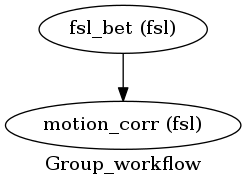

In [25]:
Image(filename=wf.write_graph())

In [26]:
# 8- Run Workflow

In [27]:
wf.run()

170329-14:18:59,63 workflow INFO:
	 Workflow Group_workflow settings: ['check', 'execution', 'logging']
170329-14:18:59,104 workflow INFO:
	 Running serially.
170329-14:18:59,106 workflow INFO:
	 Executing node fsl_bet in dir: /home/jovyan/work/workshops/170327-nipype/notebooks/rfmri_group_1/Group_Test/Group_workflow/fsl_bet
170329-14:18:59,172 workflow INFO:
	 Running: bet /home/jovyan/work/data/ds000114/sub-01/func/sub-01_task-linebisection_bold.nii.gz brain.nii.gz -F
170329-14:19:06,961 workflow INFO:
	 Executing node motion_corr in dir: /home/jovyan/work/workshops/170327-nipype/notebooks/rfmri_group_1/Group_Test/Group_workflow/motion_corr
170329-14:19:06,995 workflow INFO:
	 Running: mcflirt -in /home/jovyan/work/workshops/170327-nipype/notebooks/rfmri_group_1/Group_Test/Group_workflow/fsl_bet/brain.nii.gz -out /home/jovyan/work/workshops/170327-nipype/notebooks/rfmri_group_1/Group_Test/Group_workflow/motion_corr/brain_mcf.nii.gz -mats -plots
